## Loading Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

***Importing dataset containing records of matches from Season 2008-2017***

In [2]:
ipl_data=pd.read_csv("matches.csv")
ipl_data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
bool_value_of_toss=ipl_data["toss_decision"]=="field"
ipl_data["bool_value_of_toss"]=bool_value_of_toss
ipl_data["bool_value_of_toss"]=ipl_data["bool_value_of_toss"]*1
ipl_data.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,bool_value_of_toss
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,0
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,1
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,1
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,1
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,1


In [4]:
# If you examine the dataset you will find that same elements(TEAM) have two different names
# In this case we are replacing Rising Pune Supergiant with Rising Pune Supergiants (notice the s in end).

ipl_data=ipl_data.replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [5]:
print("No. of times from 2008-2017 teams Choosing to Field after winning toss-", ipl_data[ipl_data.bool_value_of_toss == 1].shape[0])
print("No. of times from 2008-2017 teams Choosing to Bat after winning toss-", ipl_data[ipl_data.bool_value_of_toss == 0].shape[0])

No. of times from 2008-2017 teams Choosing to Field after winning toss- 363
No. of times from 2008-2017 teams Choosing to Bat after winning toss- 273


***Teams winning toss most no . of times from season 2008-2017***

In [6]:
# Team winning toss most no . of times

ipl_data["toss_winner"].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

***Teams winning most no. of matches from season 2008-2017***

In [7]:
# Teams winnig most no. of matches

ipl_data["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

***Visulaization of Teams winning most no. of tosses from Season 2007-2018***

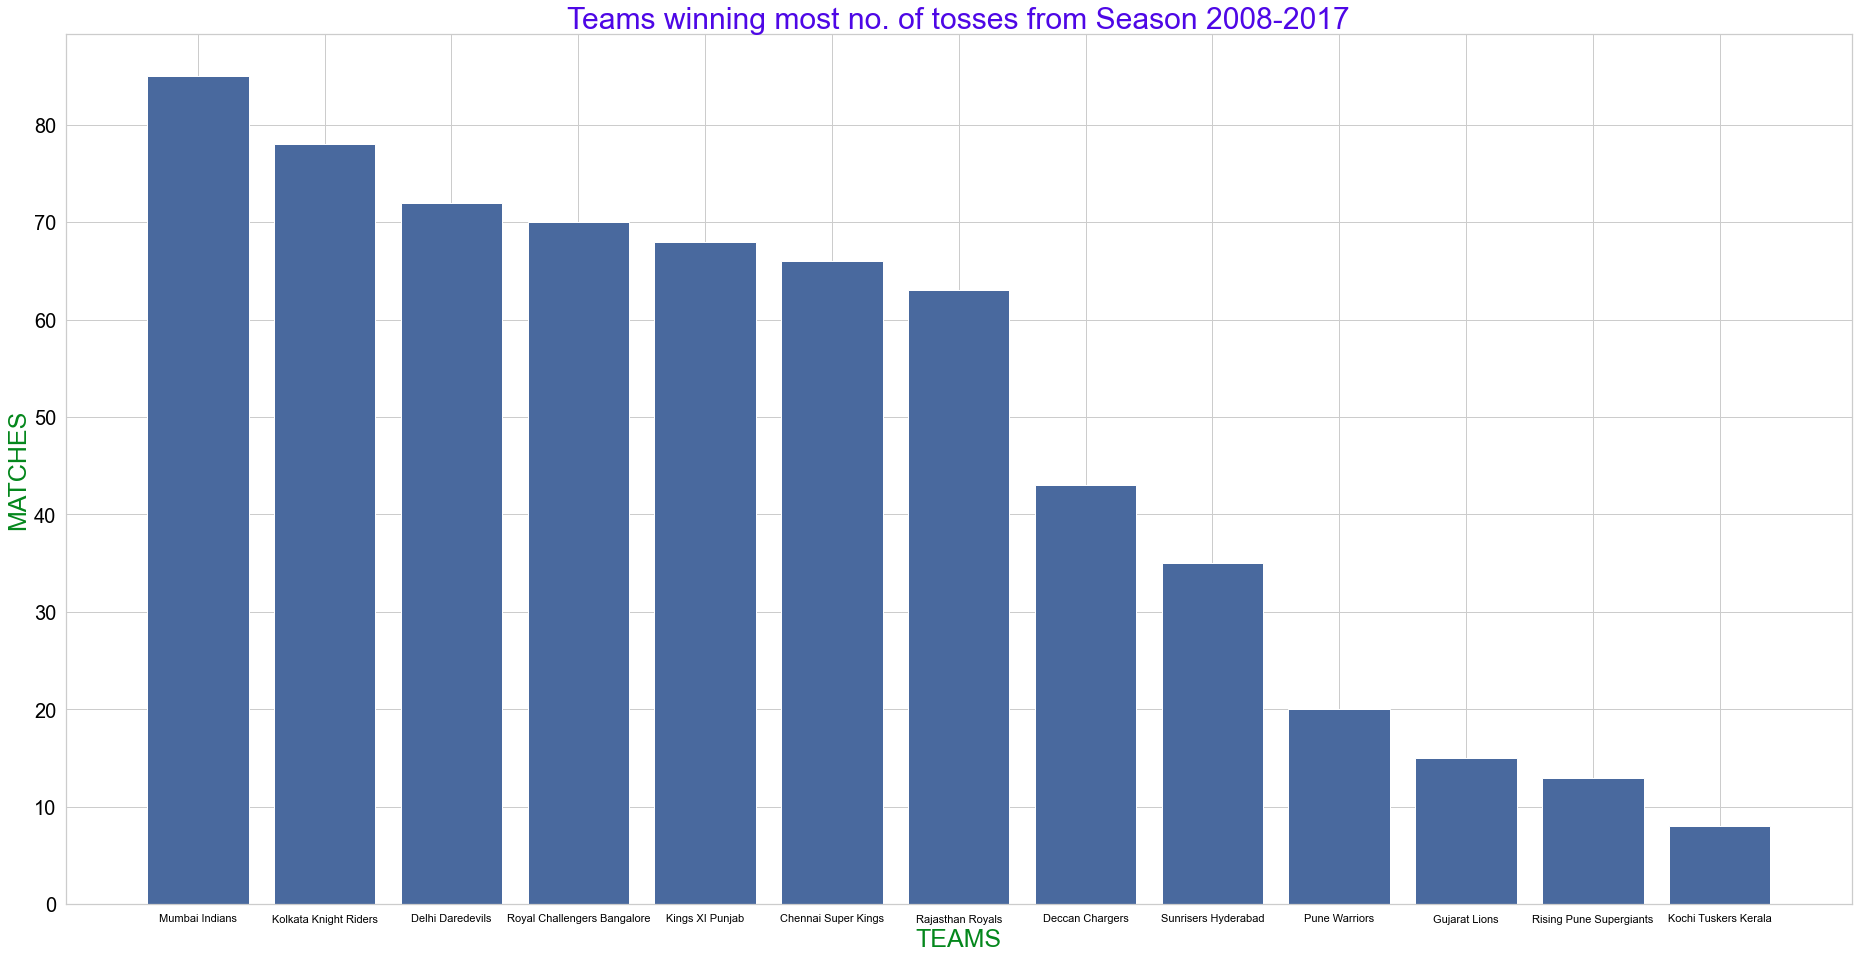

In [80]:
# Plotting teams winnig most no. of tosses

plt.figure(figsize=(32,16))
sns.set(style="whitegrid")
plt.bar(list(ipl_data["toss_winner"].value_counts().keys()),ipl_data["toss_winner"].value_counts(),color="#49699e")
plt.xticks(color="black")
plt.yticks(color="black",fontsize=20)
plt.xlabel("TEAMS",color="#04871c",fontsize=25)
plt.ylabel("MATCHES",color="#04871c",fontsize=25)
plt.title("Teams winning most no. of tosses from Season 2008-2017",fontsize=30,color="#4e07e6")
plt.show()

***Visualization teams winnig most no. of matches from Season 2007-2018***

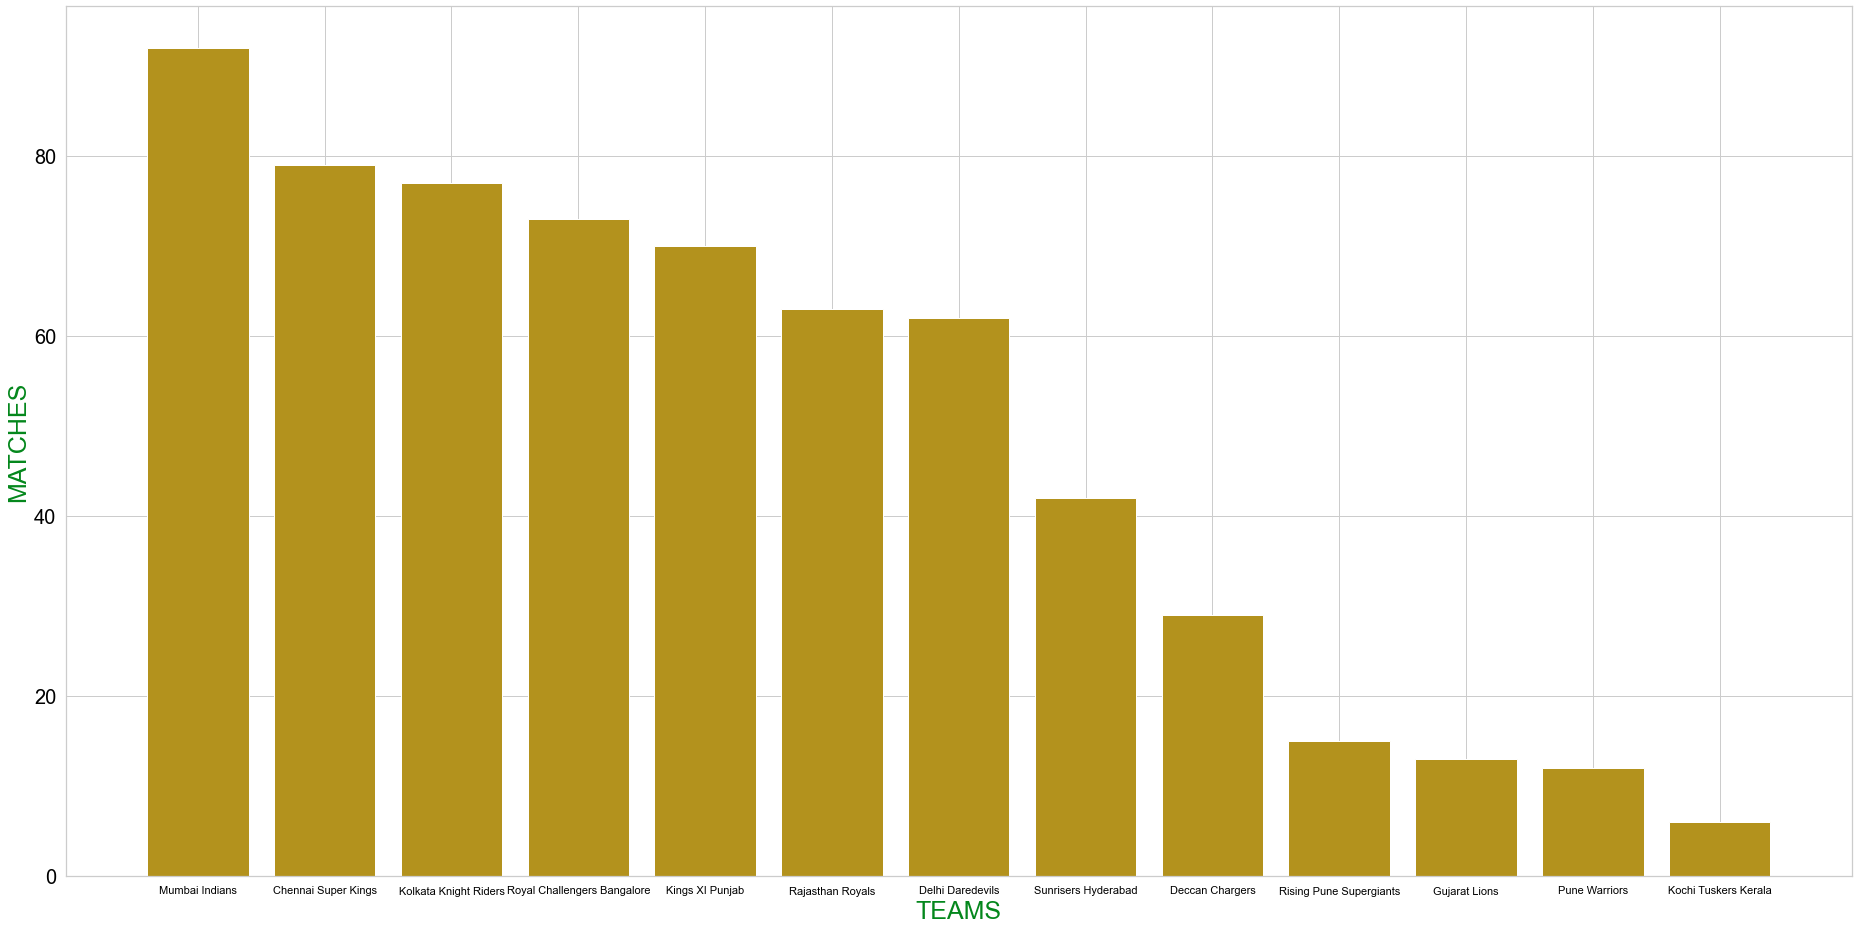

In [9]:
# Plotting teams winnig most no. of matches

plt.figure(figsize=(32,16))
sns.set(style="whitegrid")
plt.bar(list(ipl_data["winner"].value_counts().keys()),ipl_data["winner"].value_counts(),color="#b3921d")
plt.xticks(color="black")
plt.yticks(color="black",fontsize=20)
plt.xlabel("TEAMS",color="#04871c",fontsize=25)
plt.ylabel("MATCHES",color="#04871c",fontsize=25)
plt.show()

***ScatterPlot depicting How winning a match depends on winning a toss***

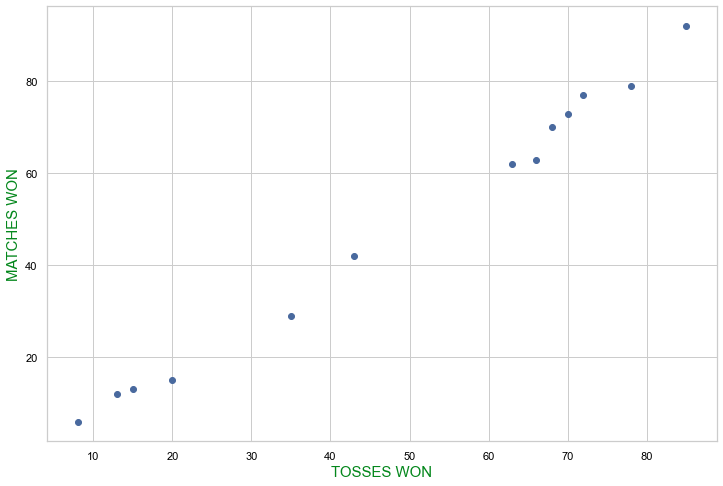

In [81]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.scatter(ipl_data["toss_winner"].value_counts(),ipl_data["winner"].value_counts(),color="#49699e")
plt.xticks(color="black")
plt.yticks(color="black")
plt.xlabel("TOSSES WON",color="#04871c",fontsize=15)
plt.ylabel("MATCHES WON",color="#04871c",fontsize=15)
plt.show()

In [11]:
X=np.array(list(ipl_data["toss_winner"].value_counts()))   # We used np.array to know the shape of X and Y as list object has no attribute shape
Y=np.array(list(ipl_data["winner"].value_counts()))

In [12]:
X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

In [13]:
regression=LinearRegression()
regression.fit(X,Y)

LinearRegression()

***Plotting the best fit line using Linear Regression Model***

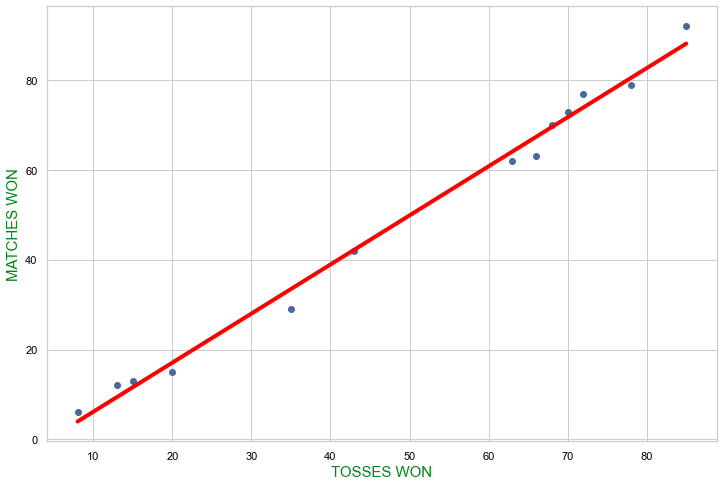

In [72]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.scatter(ipl_data["toss_winner"].value_counts(),ipl_data["winner"].value_counts(),color="#49699e")
plt.xticks(color="black")
plt.yticks(color="black")
plt.xlabel("TOSSES WON",color="#04871c",fontsize=15)
plt.ylabel("MATCHES WON",color="#04871c",fontsize=15)
plt.plot(X,regression.predict(X),color="Red",linewidth=4)
plt.show()


In [15]:
# theta_1

regression.coef_

array([[1.09310802]])

In [16]:
# theta_0

regression.intercept_

array([-4.78590026])

In [17]:
print(regression.score(X,Y))
print((regression.score(X,Y))*100,"%")

0.9919414580020794
99.19414580020795 %


***Creating a condition and plotting graph of matches played vs won by teams in overall season***

<Figure size 1440x1080 with 0 Axes>

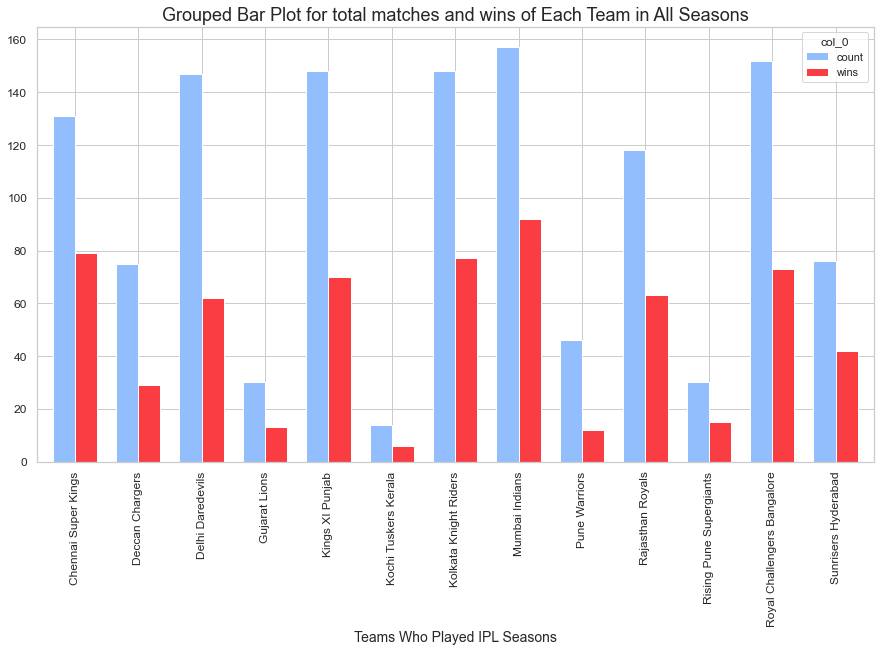

In [68]:
# Finding the number of matches played by each team.
#Finding the unique teams in the IPL Matches

team1 = ipl_data['team1'].unique()

# Finding the number of matches played as team1 and team2 by the teams 

team1_all = pd.crosstab(index = ipl_data['team1'], columns = 'count')
team2_all = pd.crosstab(index = ipl_data['team2'], columns = 'count')

# Adding both the numbers to get the total number of matches

final_team = team1_all.add(team2_all)

# Finding the total matches won by the team

plt.figure(figsize=(20,15))
winner = pd.crosstab(index = ipl_data['winner'], columns = "count")
final_team['wins'] = winner['count']
final_team[['count', 'wins']].plot(kind = 'bar' ,  width = 0.7,   color=['#93BEFE' , '#F93D43'],fontsize = 12)
plt.xlabel("Teams Who Played IPL Seasons", fontsize = 14)
plt.title("Grouped Bar Plot for total matches and wins of Each Team in All Seasons", fontsize = 18)
plt.show()

In [19]:
fielding_first=ipl_data[ipl_data["win_by_wickets"]!=0].count()[0]
batting_first=ipl_data[ipl_data["win_by_runs"]!=0].count()[0]

In [20]:
print("No. of times Teams won matches Fielding First from Season (2008-2017)-", fielding_first)
print()
print("No. of times Teams won matches Batting First from Season (2008-2017)-", batting_first)

No. of times Teams won matches Fielding First from Season (2008-2017)- 339

No. of times Teams won matches Batting First from Season (2008-2017)- 287


In [21]:
# For Finding all the teams that won matches from 2008-2017

# ipl_data["winner"].value_counts()

***No. of Matches being played at the following Stadiums***

***Condition for Counting no. of matches won by particular teams at their Home Stadiums***

Royal Challengers Bangalore (RCB)

In [22]:
teams_venue=ipl_data.loc[(ipl_data["venue"]=="M Chinnaswamy Stadium") & (ipl_data["winner"]=="Royal Challengers Bangalore")]

teams_venue.reset_index(drop=True,inplace=True)

RCB=teams_venue["winner"].value_counts()[0]

Kolkata Knight Riders (KKR)

In [23]:
teams_venuee=ipl_data.loc[(ipl_data["venue"]=="Eden Gardens") & (ipl_data["winner"]=="Kolkata Knight Riders")]

teams_venuee.reset_index(drop=True,inplace=True)

KKR=teams_venuee["winner"].value_counts()[0]

Chennai Super Kings (CSK)

In [24]:
teams_venuue=ipl_data.loc[(ipl_data["venue"]=="MA Chidambaram Stadium, Chepauk") & (ipl_data["winner"]=="Chennai Super Kings")]

teams_venuue.reset_index(drop=True,inplace=True)

CSK=teams_venuue["winner"].value_counts()[0]

Mumbai Indians (MI)

In [25]:
teams_venuue=ipl_data.loc[((ipl_data["venue"]=="Wankhede Stadium") | (ipl_data["venue"]=="Dr DY Patil Sports Academy")) & (ipl_data["winner"]=="Mumbai Indians")]

teams_venuue.reset_index(drop=True,inplace=True)

MI=teams_venuue["winner"].value_counts()[0]

Sunrisers Hyderabad (SRH)

In [26]:
teams_venuue=ipl_data.loc[(ipl_data["venue"]=="Rajiv Gandhi International Stadium, Uppal") & (ipl_data["winner"]=="Sunrisers Hyderabad")]

teams_venuue.reset_index(drop=True,inplace=True)

SRH=teams_venuue["winner"].value_counts()[0]

Kings XI Punjab

In [27]:
teams_venuue=ipl_data.loc[(ipl_data["venue"]=="Punjab Cricket Association IS Bindra Stadium, Mohali") | (ipl_data["venue"]=="Holkar Cricket Stadium") | (ipl_data["venue"]=="Himachal Pradesh Cricket Association Stadium") & (ipl_data["winner"]=="Kings XI Punjab")]

teams_venuue.reset_index(drop=True,inplace=True)

KXIP=teams_venuue["winner"].value_counts()[0]

Rajasthan Royals (RR)

In [28]:
teams_venuee=ipl_data.loc[(ipl_data["venue"]=="Sawai Mansingh Stadium") & (ipl_data["winner"]=="Rajasthan Royals")]

teams_venuee.reset_index(drop=True,inplace=True)

RR=teams_venuee["winner"].value_counts()[0]

Delhi Daredevils (DD)

In [29]:
teams_venuee=ipl_data.loc[(ipl_data["venue"]=="Feroz Shah Kotla") & (ipl_data["winner"]=="Delhi Daredevils")]

teams_venuee.reset_index(drop=True,inplace=True)

DD=teams_venuee["winner"].value_counts()[0]

In [30]:
ipl_data["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

**Pie Chart Displaying Percentage of matches won by the teams at their Home Stadiums**

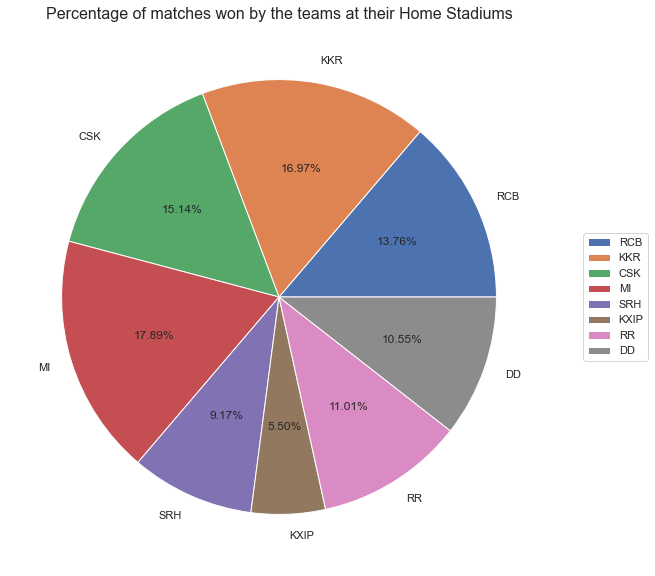

In [69]:
plt.figure(figsize=(14,10))
labels=["RCB","KKR","CSK","MI","SRH","KXIP","RR","DD"]
plt.pie([RCB,KKR,CSK,MI,SRH,KXIP,RR,DD],labels=labels,autopct="%.2f%%")
plt.title("Percentage of matches won by the teams at their Home Stadiums",fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

***Creating a for loop condition of Times Teams winning matches after winning toss and choosing to field***

In [32]:
graphdata=[]
graphkeys=[]
for a in set(ipl_data["team1"]):
    b=ipl_data.loc[(ipl_data["winner"]==a) & (ipl_data["win_by_wickets"]!=0) & (ipl_data["toss_winner"]==a)]
    bvalue=b["winner"].count()
    bkeys=b["winner"].value_counts().keys().tolist()
    graphkeys.append(a)
    graphdata.append(bvalue)

***Visualization of Times Teams winning matches after winning toss and choosing to field***

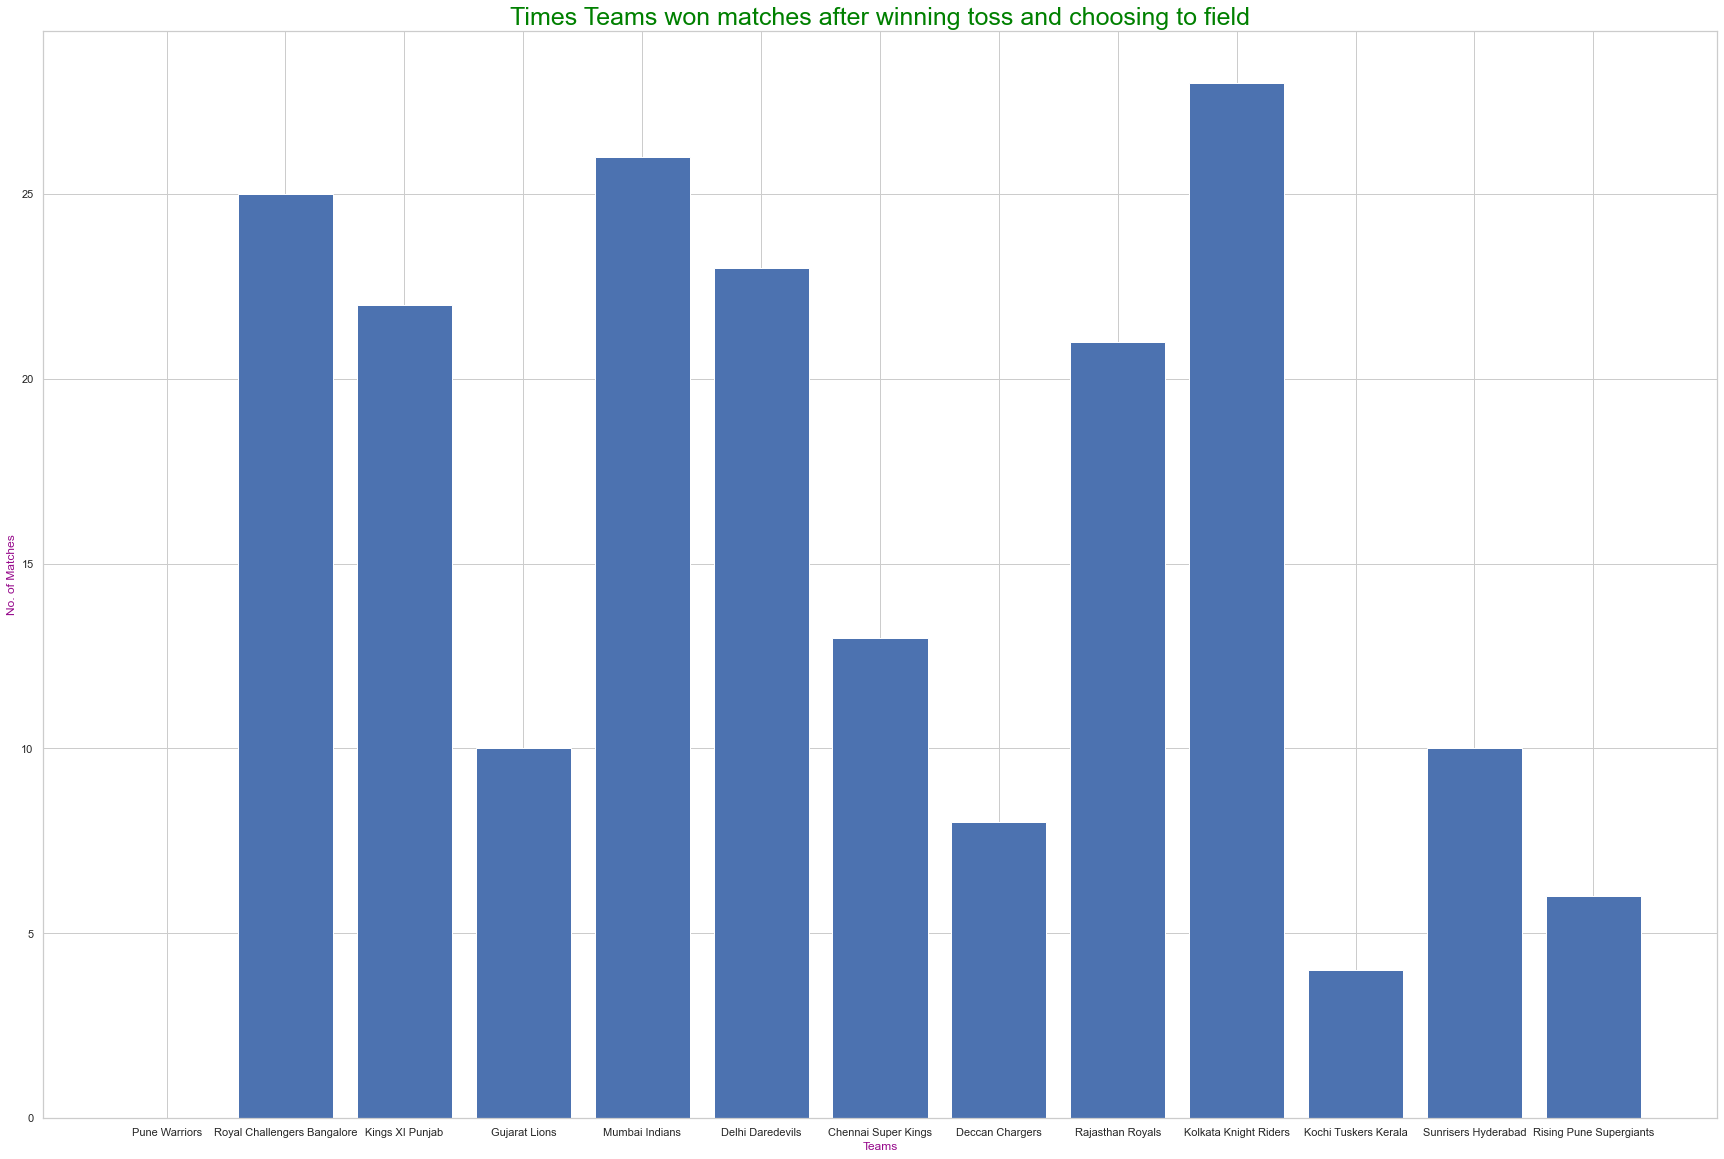

In [66]:
plt.figure(figsize=(30,20))
plt.bar(graphkeys,graphdata)
plt.xlabel("Teams",fontsize=12,color="#96088b")
plt.ylabel("No. of Matches",fontsize=12,color="#96088b")
plt.title("Times Teams won matches after winning toss and choosing to field",fontsize=25,color="green")
plt.show()

***No. of times Players won man of the match award***

In [34]:
player_of_match=ipl_data["player_of_match"].value_counts()
player_of_match

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
                  ..
RS Bopara          1
MJ Lumb            1
M Kartik           1
TA Boult           1
R Ashwin           1
Name: player_of_match, Length: 201, dtype: int64

***Visualization (Bar Graph) of No. of Times Player won man of the Match Award***

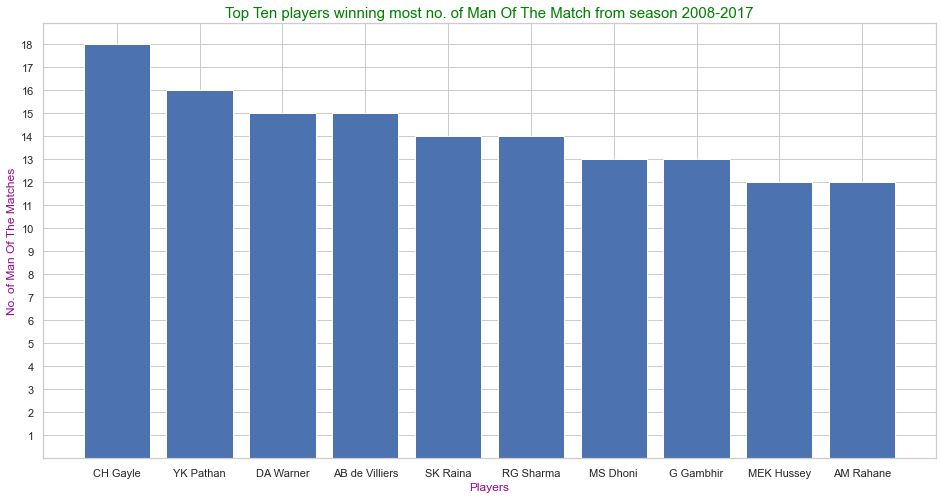

In [35]:
plt.figure(figsize=(16,8))
plt.bar(ipl_data["player_of_match"].value_counts()[0:10].keys(),ipl_data["player_of_match"].value_counts()[0:10])
plt.yticks(np.arange(1,19,step=1))
plt.xlabel("Players",fontsize=12,color="#96088b")
plt.ylabel("No. of Man Of The Matches",fontsize=12,color="#96088b")
plt.title("Top Ten players winning most no. of Man Of The Match from season 2008-2017",fontsize=15,color="green")
plt.show()

In [36]:
performance_wins=ipl_data.loc[(ipl_data["player_of_match"]=="CH Gayle") & (ipl_data["winner"]=="Royal Challengers Bangalore")]
performance_wins["winner"].value_counts()

Royal Challengers Bangalore    17
Name: winner, dtype: int64

## Importing dataset containing deliveries record from Season 2008-2017

In [40]:
balls_data=pd.read_csv("deliveries.csv")
balls_data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**Runs Scrored in the 20th over from Season 2008-2017**

In [74]:
runs_lastover=balls_data.loc[balls_data["over"]==20]
print("Runs Scrored in the 20th over from Season 2008-2017:-",sum(runs_lastover["total_runs"]))

Runs Scrored in the 20th over from Season 2008-2017:- 9647


**Runs Scrored in the Powerplay over from Season 2008-2017**

In [53]:
for i in range(1,7):
    runs_over=balls_data.loc[(balls_data["over"]==i)]
    print("Total Runs from season 2008-2017 in the over",i,":-",sum(runs_over["total_runs"]))

Total Runs from season 2008-2017 in the over 1 :- 7733
Total Runs from season 2008-2017 in the over 2 :- 8993
Total Runs from season 2008-2017 in the over 3 :- 9852
Total Runs from season 2008-2017 in the over 4 :- 10207
Total Runs from season 2008-2017 in the over 5 :- 10227
Total Runs from season 2008-2017 in the over 6 :- 10397


**No. of times Players being dismissed in the Over 1-6 from Season 2008-2017**

In [79]:
wickets_fallen=balls_data["player_dismissed"].replace(np.nan,0)
for overs in range(1,7):
    wickets_fallen=balls_data.loc[(balls_data["player_dismissed"]!=0) & (balls_data["over"]==overs)]
    print("No. of times players Being Dismissed in the Over",overs)
    print()
    print(wickets_fallen["player_dismissed"].value_counts()[0:10])
    print()

No. of times players Being Dismissed in the Over 1

PA Patel        15
V Sehwag        13
AC Gilchrist    12
G Gambhir       11
DA Warner        9
DR Smith         8
M Vijay          7
AM Rahane        7
BB McCullum      7
RV Uthappa       6
Name: player_dismissed, dtype: int64

No. of times players Being Dismissed in the Over 2

BB McCullum      17
V Sehwag         14
DA Warner        12
S Dhawan         12
JH Kallis        10
PA Patel         10
CH Gayle          9
R Dravid          8
G Gambhir         8
Mandeep Singh     8
Name: player_dismissed, dtype: int64

No. of times players Being Dismissed in the Over 3

V Sehwag        12
M Vijay         12
G Gambhir       11
CH Gayle        11
BB McCullum     10
S Dhawan        10
AC Gilchrist     9
V Kohli          9
MA Agarwal       9
AM Rahane        8
Name: player_dismissed, dtype: int64

No. of times players Being Dismissed in the Over 4

G Gambhir       13
CH Gayle        12
DA Warner       11
S Dhawan        11
M Vijay         10
V S

***Creating a condition and plotting graph of players getting dismissed in different ways in overall season of IPL***

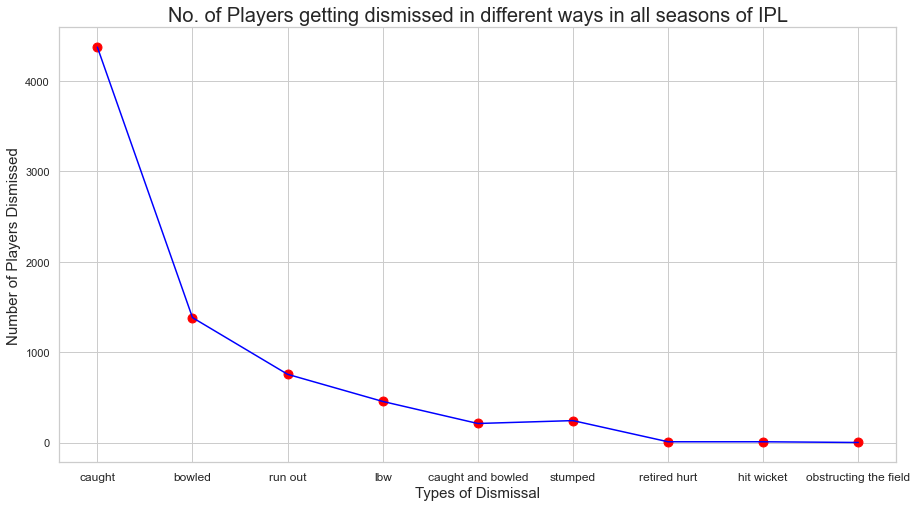

In [65]:
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 8
dismissal = balls_data.dropna(subset =  ['dismissal_kind'])
dismis = dismissal['dismissal_kind']
dismissal_type = pd.crosstab(index = dismis, columns = 'count')
dataframe = pd.DataFrame({'Number of Each Type':dismissal_type['count']})
x = np.arange(1,10,1)
y = []
xtick = [i for i in dismis.unique()]
for a in xtick:
    y.append(dataframe['Number of Each Type'][a])
plt.xticks(x,xtick, fontsize = 12)
plt.scatter(x,y,color = 'red',marker = 'o' , s =80)
plt.plot(x,y,color = 'blue')
plt.title('No. of Players getting dismissed in different ways in all seasons of IPL' , fontsize = 20)
plt.xlabel("Types of Dismissal",fontsize = 15)
plt.ylabel("Number of Players Dismissed" , fontsize = 15)
plt.show()